In [50]:
from matplotlib import pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [51]:
df = pd.read_csv('Student_Performance.csv')

In [52]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [53]:
target_col = 'Performance Index'

In [54]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [55]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


Заметим, что в данных отсуствуют пропуски.

Посмотрим на корреляцию признаков.

<Axes: >

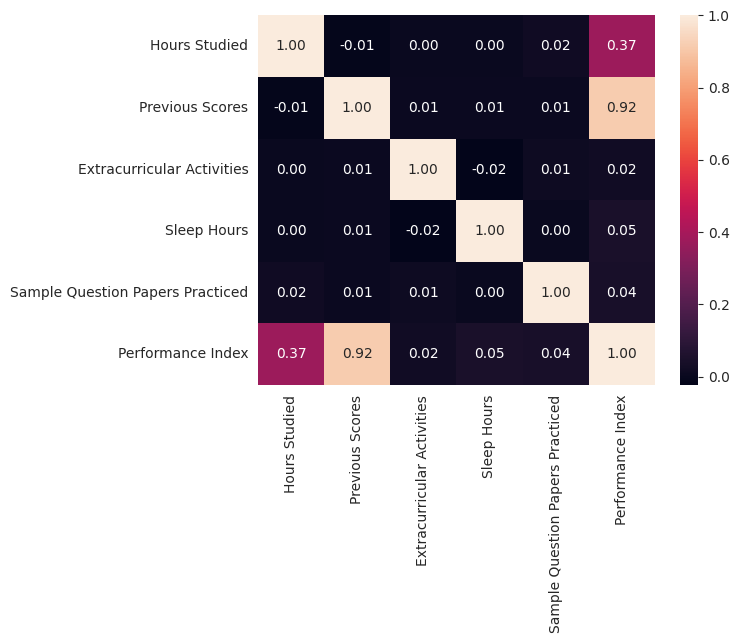

In [57]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, fmt='.2f')

Заметим, что никакие из фич не коррелируют между собой.
Это означает, что их можно использовать одновременно.
Построим графики их распределения.

<Figure size 640x480 with 0 Axes>

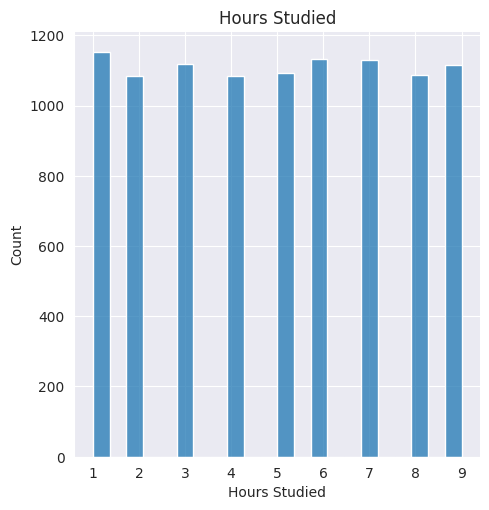

<Figure size 640x480 with 0 Axes>

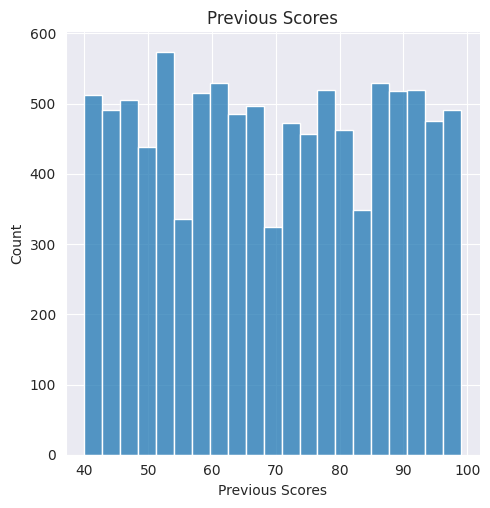

<Figure size 640x480 with 0 Axes>

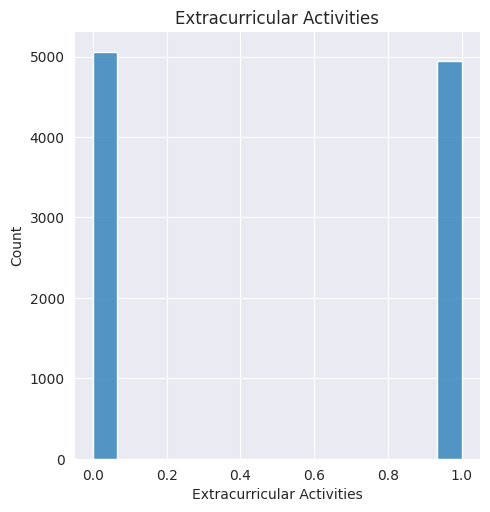

<Figure size 640x480 with 0 Axes>

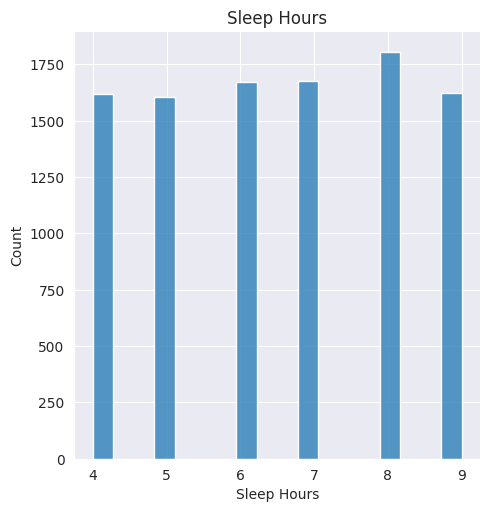

<Figure size 640x480 with 0 Axes>

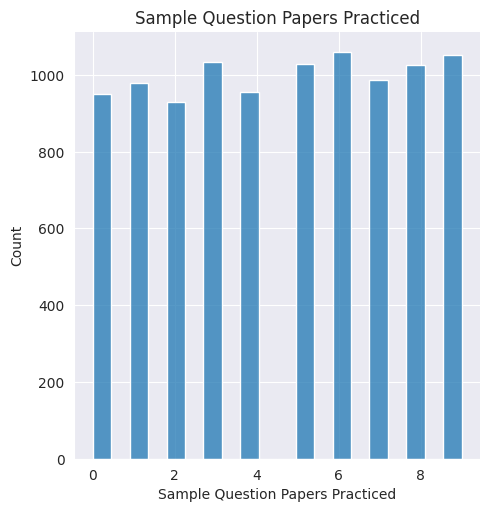

<Figure size 640x480 with 0 Axes>

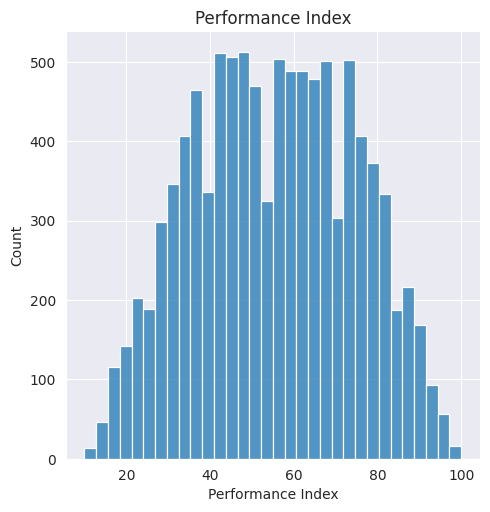

In [58]:
for col in df.columns:
    plt.figure()
    sns.displot(df[col])
    plt.title(col)
    plt.show()

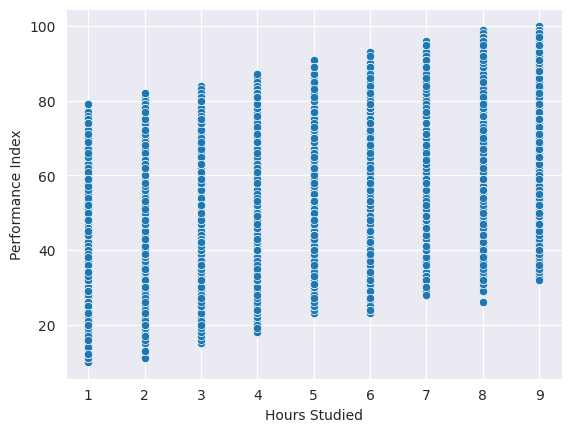

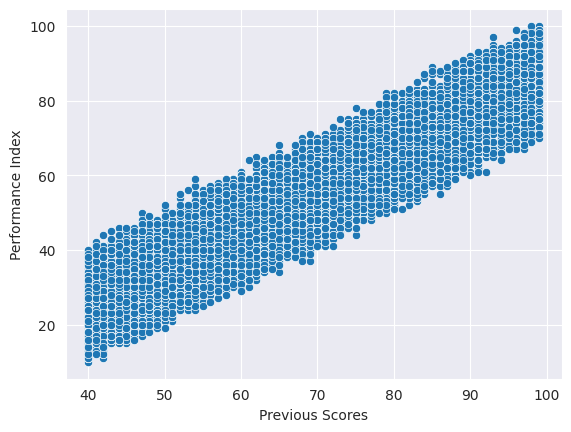

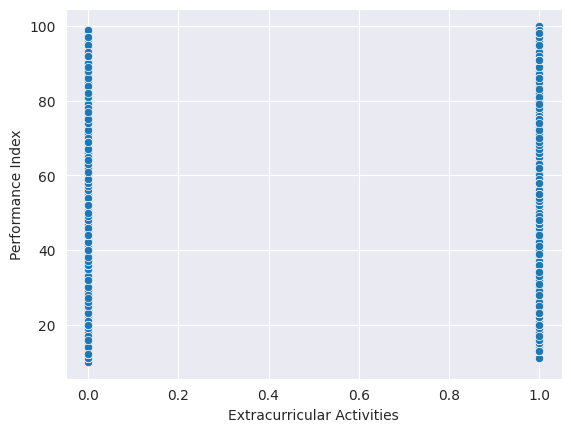

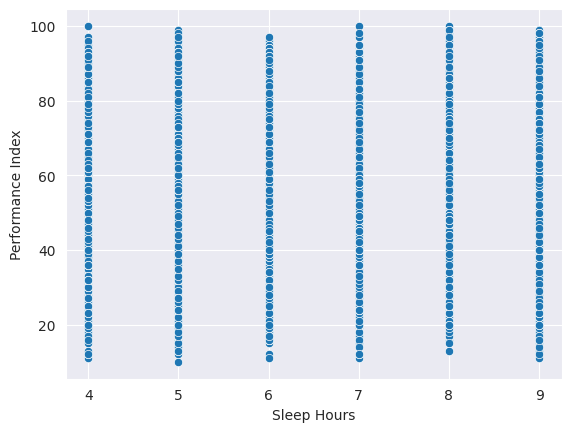

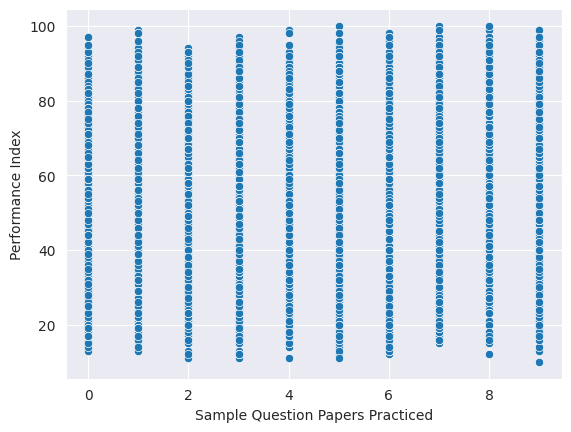

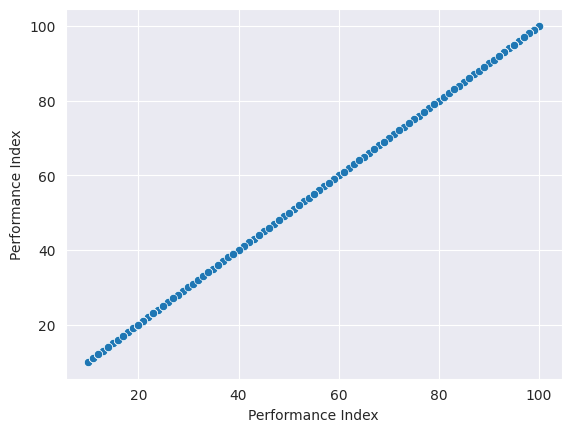

In [59]:
for i in df.columns:
    sns.scatterplot(x=df[i], y=df[target_col])
    plt.show()

Заметим, что в данных нету выбросов.

Заметим, что Previous scores и Hours studied заметно коррелируют с целевой переменной. Это значит, что они будут самыми важными признаками.

Посмтроим модель линейной регрессии на основе МНК

In [60]:
import numpy as np

In [61]:
class LinearReggressor:
    def __init__(self):
        self.w = None

    def fit(self, x, y):
        xtmp = x.copy()
        xtmp['ones'] = 1
        y = np.array(y)
        self.w = np.linalg.inv((xtmp.T @ xtmp)) @ xtmp.T @ y

    def predict(self, x):
        xtmp = x.copy()
        xtmp['ones'] = 1
        return np.array(xtmp) @ self.w

In [62]:
def det_coeff(y, y_pred):
    y_mean = np.mean(y)
    return 1 - np.sum((y - y_pred) ** 2) / np.sum((y - y_mean) ** 2)

Рассмотрим три набора признаков:
1. Все признаки
2. Previous Scores + Hours Studied
3. Previous Scores + Sample Question Papers Practiced + Sleep Hours

In [63]:
def normalize_data_minmax(data):
    return (data - data.min()) / (data.max() - data.min())

normalized_df = normalize_data_minmax(df.drop(target_col, axis=1))

normalized_df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.750,1.000000,1.0,1.0,0.111111
1,0.375,0.711864,0.0,0.0,0.222222
2,0.875,0.186441,1.0,0.6,0.222222
3,0.500,0.203390,1.0,0.2,0.222222
4,0.750,0.593220,0.0,0.8,0.555556
...,...,...,...,...,...
9995,0.000,0.152542,1.0,0.0,0.222222
9996,0.750,0.406780,1.0,0.8,0.555556
9997,0.625,0.728814,1.0,0.8,0.555556
9998,1.000,0.966102,1.0,0.6,0.000000


In [64]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(normalized_df, df[target_col], test_size=0.2)

x_train2, x_test2, y_train2, y_test2 = train_test_split(normalized_df[['Previous Scores', 'Hours Studied']], df[target_col], test_size=0.2)

x_train3, x_test3, y_train3, y_test3 = train_test_split(normalized_df[['Previous Scores', 'Sample Question Papers Practiced', 'Sleep Hours']], df[target_col], test_size=0.2)

In [65]:
results = {}

regressor = LinearReggressor()
regressor.fit(x_train1, y_train1)
y_pred1 = regressor.predict(x_test1)
results['all'] = det_coeff(y_test1, y_pred1)

regressor.fit(x_train2, y_train2)
y_pred2 = regressor.predict(x_test2)
results['prev+hours'] = det_coeff(y_test2, y_pred2)

regressor.fit(x_train3, y_train3)
y_pred3 = regressor.predict(x_test3)
results['prev+sample+sleep'] = det_coeff(y_test3, y_pred3)

<BarContainer object of 3 artists>

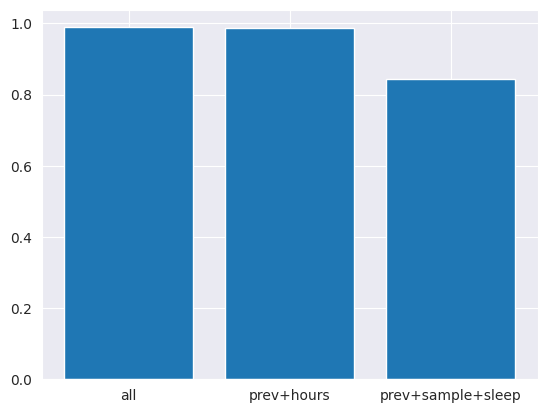

In [66]:
plt.bar(results.keys(), results.values())

Можно сделать вывод, что в данном случае при увеличении количества признаков качество модели улучшается. Это обусловлено тем, что признаки не коррелируют между собой и не вносят шум в модель.

Причем самыми важными признаками являются Previous Scores и Hours Studied, так как модель на их основе имеет коэффициент детерминации, близкий к 1.

Попробуем создать свой признак на основе Hours Studied и Sleep Hours.
Назовем его Productivity Hours.

In [67]:
normalized_df['Productivity Hours'] = normalized_df['Hours Studied'] * normalized_df['Sleep Hours']

normalized_df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Productivity Hours
0,0.750,1.000000,1.0,1.0,0.111111,0.750
1,0.375,0.711864,0.0,0.0,0.222222,0.000
2,0.875,0.186441,1.0,0.6,0.222222,0.525
3,0.500,0.203390,1.0,0.2,0.222222,0.100
4,0.750,0.593220,0.0,0.8,0.555556,0.600


<BarContainer object of 4 artists>

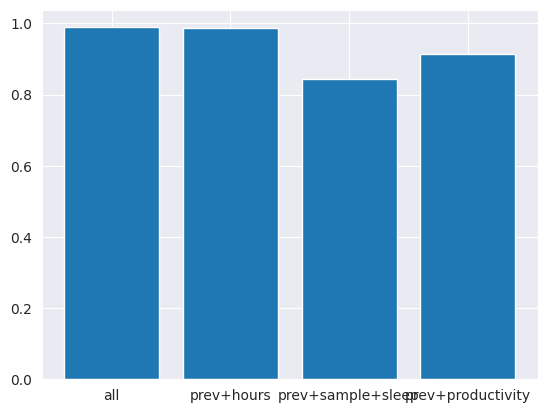

In [68]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(normalized_df[['Previous Scores', 'Productivity Hours']], df[target_col], test_size=0.2)
regressor.fit(x_train4, y_train4)
y_pred4 = regressor.predict(x_test4)
results['prev+productivity'] = det_coeff(y_test4, y_pred4)

plt.bar(results.keys(), results.values())

Так как в prev+hours и так коэффициент детерминации был близок к 1, то добавление нового признака не улучшило модель.